# CAR PRICE PREDICTION

•	Business Problem Framing
 With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. With the change in market due to covid 19 impact, the previous ML models are not performing well.

•	Conceptual Background of the Domain Problem
A good knowledge of after sales market of cars is necessary. What makes a car valuable will be key.

•	Motivation for the Problem Undertaken
Due to covid-19 the car market has changed a lot, some cars have shot up in popularity and some gone down in price.


In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("car_data.csv", index_col = 'Unnamed: 0') # Importing the data
pd.set_option('display.max_columns', 500)

In [3]:
df.head() # Probing the data

,Name,Transmission type,Variant,Mileage,Owned,Fuel type,City,Price
0,2013 Hyundai Verna,Manual,FLUIDIC 1.6 SX CRDI OPT Manual,"53,517 km",1st Owner,Diesel,Rohtak,"₹4,82,299"
1,2018 Hyundai Creta,Manual,1.6 E + VTVT Manual,"39,294 km",2nd Owner,Petrol,Rohtak,"₹8,98,999"
2,2017 Maruti Swift,Manual,VDI ABS Manual,"69,894 km",1st Owner,Diesel,Rohtak,"₹4,74,699"
3,2018 Hyundai Elite i20,Manual,SPORTZ 1.2 Manual,"48,582 km",1st Owner,Petrol,Rohtak,"₹5,90,199"
4,2020 MG HECTOR,Manual,SHARP HYBIRD PETROL MT Manual,"3,094 km",1st Owner,Petrol,Rohtak,"₹17,04,999"


In [4]:
df.replace(',','', regex=True, inplace=True) # Replacing the transmission type from name as we already have it
df['Variant'] = df['Variant'].str.replace('Manual', '')
df['Variant'] = df['Variant'].str.replace('Automatic', '')

In [5]:
df.tail()

,Name,Transmission type,Variant,Mileage,Owned,Fuel type,City,Price
3540,2020 Maruti Alto,Manual,VXI,7802 km,1st Owner,Petrol,Lucknow,₹383899
3541,2020 Maruti Alto,Manual,VXI,4749 km,1st Owner,Petrol,Lucknow,₹376999
3542,2019 Mahindra TUV300,Manual,T10 MT,15334 km,1st Owner,Diesel,Lucknow,₹867299
3543,2019 Maruti New Wagon-R,Manual,VXI 1.0,13314 km,1st Owner,Petrol,Lucknow,₹523099
3544,2016 Maruti Alto K10,Manual,VXI,16451 km,1st Owner,Petrol,Lucknow,₹299499


In [6]:
df.shape # We have 5339 rows and 8 coulmns

(3545, 8)

In [7]:
df.info() # Basic info about data types, we will need to convert some of them to integer

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3545 entries, 0 to 3544
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               3545 non-null   object
 1   Transmission type  3468 non-null   object
 2   Variant            3545 non-null   object
 3   Mileage            3545 non-null   object
 4   Owned              3545 non-null   object
 5   Fuel type          3545 non-null   object
 6   City               3545 non-null   object
 7   Price              3545 non-null   object
dtypes: object(8)
memory usage: 249.3+ KB


In [8]:
df.nunique() # Unique values in each column

Name                  385
Transmission type       2
Variant               478
Mileage              2128
Owned                   4
Fuel type               4
City                   22
Price                1883
dtype: int64

In [9]:
df.isnull().sum() # Some value in transmission type are missing

Name                  0
Transmission type    77
Variant               0
Mileage               0
Owned                 0
Fuel type             0
City                  0
Price                 0
dtype: int64

<AxesSubplot:>

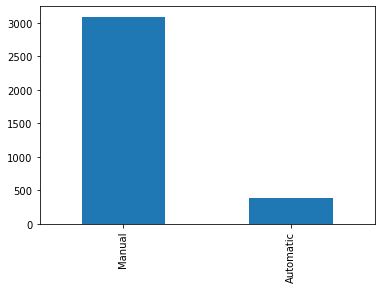

In [10]:
df['Transmission type'].value_counts().plot.bar() 

Most of the cars are Manual transmission.

In [11]:
df['Year'] = df.Name.str[:4] # Extracting year from name, and storing it as integer
df['Year'] = df['Year'].astype(int)

In [12]:
df.Name = df.Name.str[4:] # Slicing the name so that it doesn't contain the year

In [13]:
df.Mileage = df.Mileage.str[:-3] # Removing ' km' form end of Mileage and converting it to integer
df['Mileage'] = df['Mileage'].astype(int)

In [14]:
df.Price = df.Price.str[1:] # Removing the rupee symbol '₹' from price, and changign type to integer
df ['Price'] = df['Price'].astype(int)

In [15]:
df['Manufacturer'] = df['Name'].str.split(' ').str[1] # Removing white space, and separating Manufacturer name form car name
df['Model'] = df['Name'].str.split(' ').str[2]

In [16]:
df.head() # Checking if everythgin worked right, it has.

,Name,Transmission type,Variant,Mileage,Owned,Fuel type,City,Price,Year,Manufacturer,Model
0,Hyundai Verna,Manual,FLUIDIC 1.6 SX CRDI OPT,53517,1st Owner,Diesel,Rohtak,482299,2013,Hyundai,Verna
1,Hyundai Creta,Manual,1.6 E + VTVT,39294,2nd Owner,Petrol,Rohtak,898999,2018,Hyundai,Creta
2,Maruti Swift,Manual,VDI ABS,69894,1st Owner,Diesel,Rohtak,474699,2017,Maruti,Swift
3,Hyundai Elite i20,Manual,SPORTZ 1.2,48582,1st Owner,Petrol,Rohtak,590199,2018,Hyundai,Elite
4,MG HECTOR,Manual,SHARP HYBIRD PETROL MT,3094,1st Owner,Petrol,Rohtak,1704999,2020,MG,HECTOR


In [17]:
df['Transmission type'].value_counts() # Value counts of transmission

Manual       3091
Automatic     377
Name: Transmission type, dtype: int64

In [18]:
df['Owned'].value_counts() # Value counts of Owned

1st Owner    2960
2nd Owner     524
3rd Owner      58
4th Owner       3
Name: Owned, dtype: int64

In [19]:
df['Fuel type'].value_counts() # Value counts of Fuel type

Petrol          2497
Diesel          1002
Petrol + CNG      45
Petrol + LPG       1
Name: Fuel type, dtype: int64

In [20]:
df['City'].value_counts() # Value counts of City

Pune          400
Mumbai        400
Jaipur        273
Surat         269
Ahmedabad     269
Bengaluru     255
Chennai       223
Vadodara      216
Ludhiana      153
Chandigarh    153
Kolkata       148
Delhi         123
Panipat       117
Rohtak        116
Kochi         116
Meerut        110
Nasik          73
Hyderabad      41
Lucknow        33
Rajkot         20
Mysore         20
Bhopal         17
Name: City, dtype: int64

In [21]:
df.describe() # Cheking some basic stats about our data

,Mileage,Price,Year
count,3545.000000,3.545000e+03,3545.000000
mean,42015.167842,5.938214e+05,2017.024824
std,34391.964045,2.971286e+05,2.222259
min,120.000000,1.263990e+05,2008.000000
25%,16358.000000,3.943990e+05,2016.000000
50%,32576.000000,5.254990e+05,2017.000000
75%,61003.000000,7.099990e+05,2019.000000
max,280921.000000,2.322099e+06,2021.000000


Minimum Mileage 350 km;
Maximum Mileage 1,000,000 km

Oldest car: 2008;
Newest car: 2021

Minimum price: Rs. 126,000;
Maximum price of car: Rs. 29,380,000

#### EDA

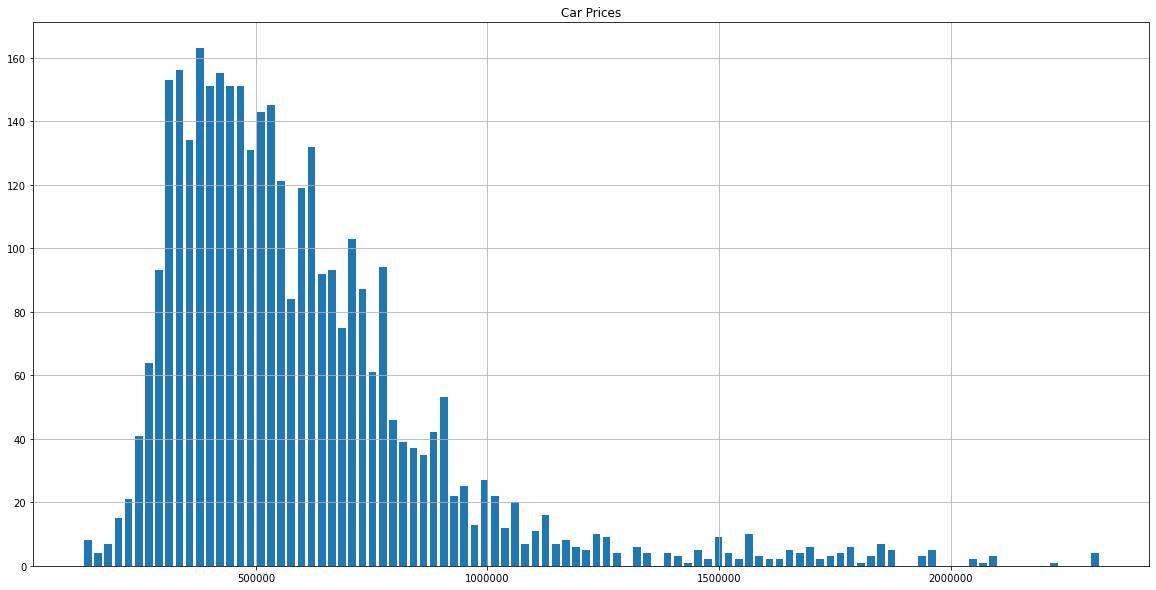

In [22]:
# Looking at distribution of selling price of car, which is our target variable.
# We can observe that the distribution is right skewed

df['Price'].hist(bins=100,figsize=(20,10),rwidth = 0.75)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Car Prices')
plt.show()

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

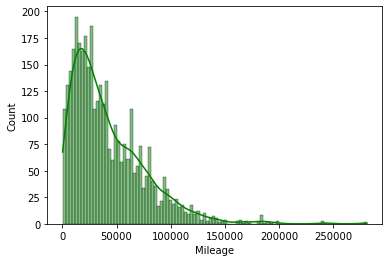

In [23]:
sns.histplot(df['Mileage'],bins = 100 , kde = True, color = 'green') # Most of the mileage of cars is less that 200,000 km

<AxesSubplot:xlabel='Year', ylabel='Count'>

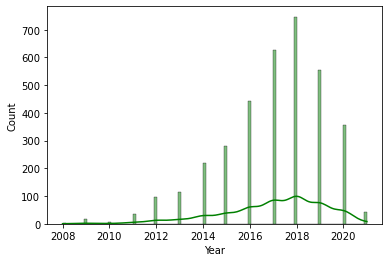

In [24]:
sns.histplot(df['Year'],bins = 100 , kde = True, color = 'green') #Most of the year range from 2012-2020

We can see that most of the cars in this data were bought between 2015 and 2020

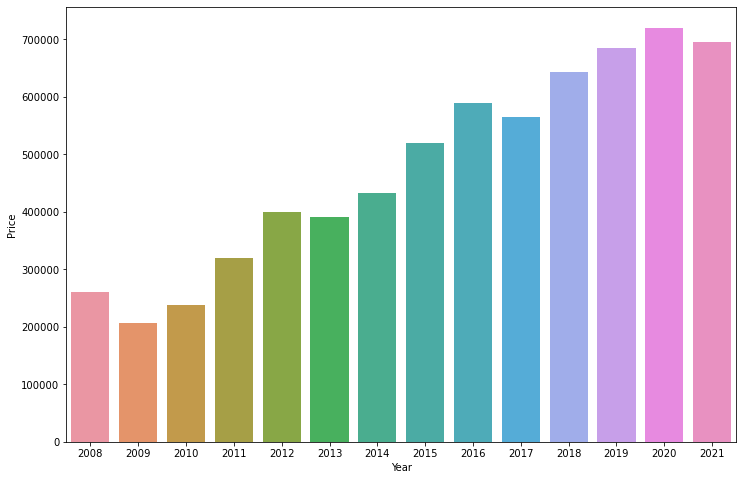

In [25]:
df_2 = df.groupby('Year').mean()
df_2.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Year', y='Price', data=df_2,ax=ax);

Average price of car vs year; we can see the average price of car increases if the car is not very old.

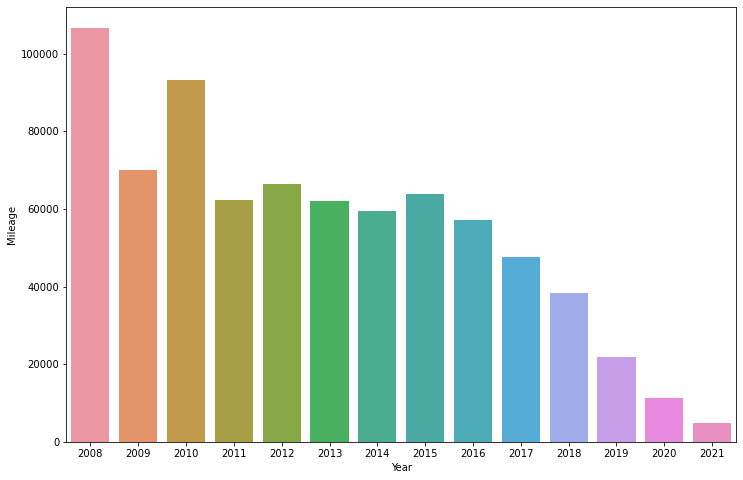

In [26]:
df_2 = df.groupby('Year').mean()
df_2.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Year', y='Mileage', data=df_2,ax=ax);

Average mileage in km on a car, based on the year the car was manufactured; we can observe that the mileage is more for older cars; as expected.

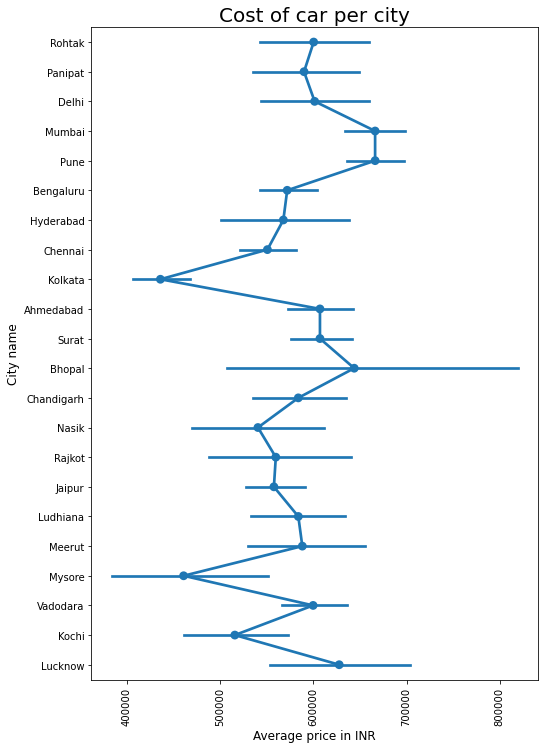

In [27]:
f,ax1 = plt.subplots(figsize = (8,12))
sns.pointplot(y = df.City, x = df['Price'], join=True, data= df )
plt.xticks(rotation = 90)
plt.title("Cost of car per city",{'fontsize':20})
plt.xlabel('Average price in INR',{'fontsize' : 'large'})
plt.ylabel('City name',{'fontsize':'large'})
plt.show()

Average price of car according to city in which it was listed. Bhopal has the most expensive cars and Mysore has the least expensive cars.

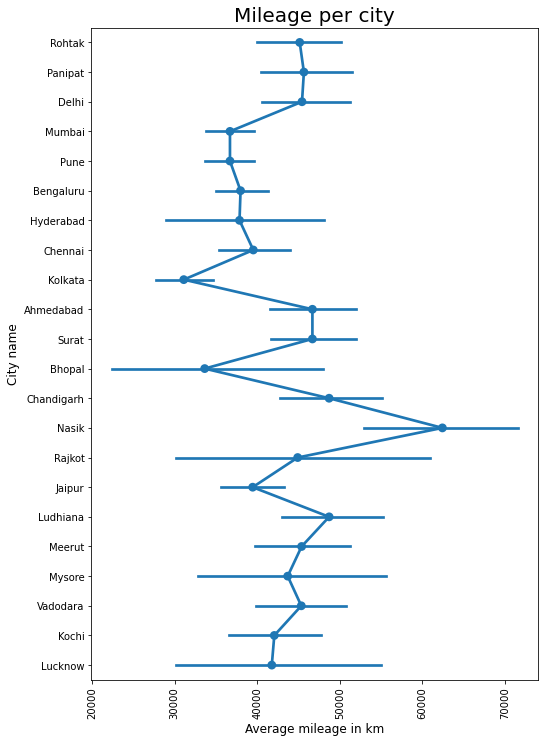

In [28]:
f,ax1 = plt.subplots(figsize = (8,12))
sns.pointplot(y = df.City, x = df['Mileage'], join=True, data= df )
plt.xticks(rotation = 90)
plt.title("Mileage per city",{'fontsize':20})
plt.xlabel('Average mileage in km',{'fontsize' : 'large'})
plt.ylabel('City name',{'fontsize':'large'})
plt.show()

Average mileage of car (in km) according to city in which it was listed. Nashik has the most driven cars and Kolkata has the least driven cars.

Checking the data for some cars

In [29]:
df[['Mileage']].idxmax() # Which df index has maximum mileage

Mileage    2068
dtype: int64

In [30]:
df.iloc[1879] # This car has max mileage

Name                  Maruti Baleno
Transmission type            Manual
Variant              DELTA 1.2 K12 
Mileage                         216
Owned                     1st Owner
Fuel type                    Petrol
City                      Ahmedabad
Price                        705499
Year                           2020
Manufacturer                 Maruti
Model                        Baleno
Name: 1879, dtype: object

In [31]:
df[['Price']].idxmax() # Which df index has maximum price

Price    77
dtype: int64

In [32]:
df.iloc[2007] # This car has max price

Name                  Renault TRIBER
Transmission type             Manual
Variant                     1.0 RXZ 
Mileage                        12226
Owned                      1st Owner
Fuel type                     Petrol
City                       Ahmedabad
Price                         561099
Year                            2019
Manufacturer                 Renault
Model                         TRIBER
Name: 2007, dtype: object

In [33]:
df[['Price']].idxmin() # Which df index has minimum price

Price    47
dtype: int64

In [34]:
df.iloc[92] # This car has min price

Name                  Maruti Eeco
Transmission type          Manual
Variant                    7 STR 
Mileage                     72019
Owned                   1st Owner
Fuel type                  Petrol
City                       Rohtak
Price                      329399
Year                         2018
Manufacturer               Maruti
Model                        Eeco
Name: 92, dtype: object

In [35]:
df[['Mileage']].idxmin() # Which df index has minimum mileage

Mileage    1265
dtype: int64

In [36]:
df.iloc[2059] # This car has min mileage

Name                        Ford Ecosport
Transmission type                  Manual
Variant              1.5 TITANIUM TI VCT 
Mileage                             11869
Owned                           1st Owner
Fuel type                          Petrol
City                            Ahmedabad
Price                              749499
Year                                 2019
Manufacturer                         Ford
Model                            Ecosport
Name: 2059, dtype: object

#### Pre-processing data

In [37]:
df.nunique() # Now to simplify the data

Name                  109
Transmission type       2
Variant               478
Mileage              2128
Owned                   4
Fuel type               4
City                   22
Price                1883
Year                   14
Manufacturer           22
Model                  93
dtype: int64

In [38]:
df['Manufacturer'].value_counts() # We have a lot of manufacturers

Maruti        1960
Hyundai        768
Ford           206
Honda          168
Renault         86
Volkswagen      76
Tata            63
Toyota          53
Mahindra        42
KIA             27
MG              22
Datsun          15
Jeep            14
Skoda           12
Audi             9
BMW              8
Mercedes         6
Ssangyong        4
Nissan           3
HYUNDAI          1
Chevrolet        1
RENAULT          1
Name: Manufacturer, dtype: int64

Now I will simplify the engine size and convert it to a range, I will also convert various variants of engine to get a better description.

In [39]:
df.loc[df['Variant'].str.contains('LXI', case=False), 'Variant'] = 'Basic Petrol'
df.loc[df['Variant'].str.contains('VXI', case=False), 'Variant'] = 'Middle Petrol'
df.loc[df['Variant'].str.contains('ZXI', case=False), 'Variant'] = 'Top Petrol'
df.loc[df['Variant'].str.contains('VDI', case=False), 'Variant'] = 'Basic Diesel'
df.loc[df['Variant'].str.contains('VDI', case=False), 'Variant'] = 'Middle Diesel'
df.loc[df['Variant'].str.contains('ZDI', case=False), 'Variant'] = 'Top Diesel'
df.loc[df['Variant'].str.contains('LUXURY', case=False), 'Variant'] = 'Luxury'
df.loc[df['Variant'].str.contains('1.0', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.1', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.2', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.3', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.4', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.5', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('1.6', case=False), 'Variant'] = '1.5-2.0 Liter'
df.loc[df['Variant'].str.contains('1.7', case=False), 'Variant'] = '1.5-2.0 Liter'
df.loc[df['Variant'].str.contains('1.8', case=False), 'Variant'] = '1.5-2.0 Liter'
df.loc[df['Variant'].str.contains('1.9', case=False), 'Variant'] = '1.5-2.0 Liter'
df.loc[df['Variant'].str.contains('2.0', case=False), 'Variant'] = '1.5-2.0 Liter'
df.loc[df['Variant'].str.contains('2.1', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.2', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.3', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.4', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.5', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.6', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.7', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.8', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('2.9', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.0', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.1', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.2', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.3', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.4', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('3.5', case=False), 'Variant'] = '2.0+ Liter'
df.loc[df['Variant'].str.contains('5 STR WITH AC PLUSHTR', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('RXL', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('V MT PETROL', case=False), 'Variant'] = '1.0-1.5 Liter'
df.loc[df['Variant'].str.contains('ERA PLUS', case=False), 'Variant'] = '1.0-1.5 Liter'

In [40]:
df.loc[df.groupby('Variant').Variant.transform('count').lt(20), 'Variant'] = 'Other' 

# Combining variants as Other which have less than 20 value counts to simplify the data

In [41]:
df['Variant'].value_counts()

1.0-1.5 Liter    1531
Middle Petrol     663
Basic Diesel      319
Other             274
Basic Petrol      249
1.5-2.0 Liter     178
Top Diesel        148
Top Petrol        118
2.0+ Liter         45
RXT                20
Name: Variant, dtype: int64

In [42]:
df['Model'].value_counts() # We have 100 different car models

Alto       485
Swift      362
Baleno     260
Vitara     214
Grand      178
          ... 
Glanza       1
Lodgy        1
Terrano      1
Captur       1
Cruze        1
Name: Model, Length: 93, dtype: int64

In [43]:
df['Name'].value_counts() # We have 115 different names

 Maruti Swift               271
 Maruti Baleno              260
 Maruti Vitara Brezza       214
 Maruti Alto 800            198
 Hyundai Grand i10          178
                           ... 
 Mercedes Benz GLA Class      1
 Nissan Terrano               1
 Renault Captur               1
 Toyota YARIS                 1
 Honda CRV                    1
Name: Name, Length: 109, dtype: int64

In [44]:
df.drop(['Name'], axis = 1, inplace = True) # Dropping the name columns as I have already separated it into 'Name' and 'Model'

### EDA

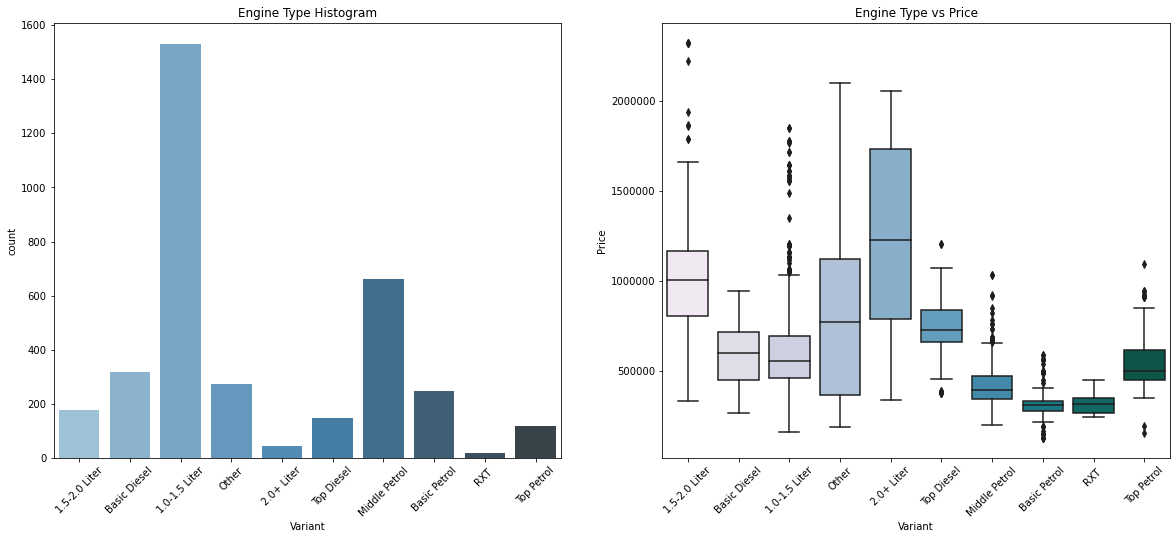

In [45]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
plt.xticks(rotation=45)
sns.countplot(df.Variant, palette=("Blues_d"))
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df.Variant, y=df.Price, palette=("PuBuGn"))

plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Count plot and price plot according to the cars engine variant

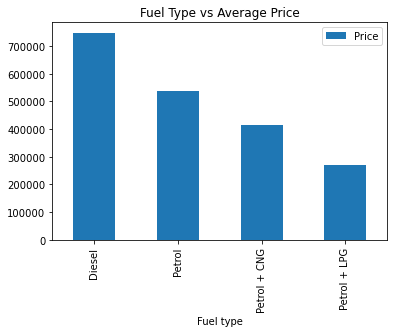

In [46]:
df_fuel = pd.DataFrame(df.groupby(['Fuel type'])['Price'].mean().sort_values(ascending = False))
df_fuel.plot.bar()
plt.ticklabel_format(style='plain', axis='y')
plt.title('Fuel Type vs Average Price')
plt.show()

Average price of car with respect to the fuel type. Diesel is most evpensive, then petrol, least expensive is Petrol + LPG

In [47]:
df.head()

,Transmission type,Variant,Mileage,Owned,Fuel type,City,Price,Year,Manufacturer,Model
0,Manual,1.5-2.0 Liter,53517,1st Owner,Diesel,Rohtak,482299,2013,Hyundai,Verna
1,Manual,1.5-2.0 Liter,39294,2nd Owner,Petrol,Rohtak,898999,2018,Hyundai,Creta
2,Manual,Basic Diesel,69894,1st Owner,Diesel,Rohtak,474699,2017,Maruti,Swift
3,Manual,1.0-1.5 Liter,48582,1st Owner,Petrol,Rohtak,590199,2018,Hyundai,Elite
4,Manual,Other,3094,1st Owner,Petrol,Rohtak,1704999,2020,MG,HECTOR


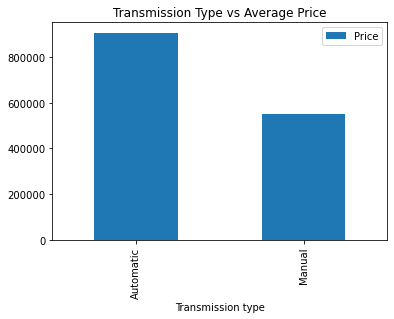

In [48]:
df_trans = pd.DataFrame(df.groupby(['Transmission type'])['Price'].mean().sort_values(ascending = False))
df_trans.plot.bar()
plt.ticklabel_format(style='plain', axis='y')
plt.title('Transmission Type vs Average Price')
plt.show()

As expected cars which have automatic transmission are on average priced above Rs. 80,000 and cars which have manual transmission are on average price around Rs 50,000

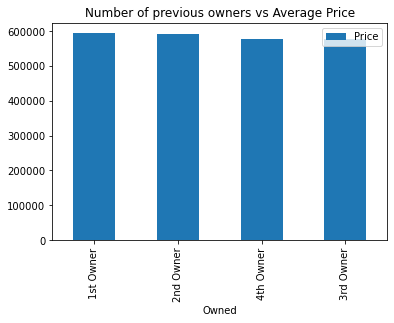

In [49]:
df_ownd = pd.DataFrame(df.groupby(['Owned'])['Price'].mean().sort_values(ascending = False))
df_ownd.plot.bar()
plt.ticklabel_format(style='plain', axis='y')
plt.title('Number of previous owners vs Average Price')
plt.show()

We can observe that as number of owners go up, the average price of car decreases, this is what one would expect.

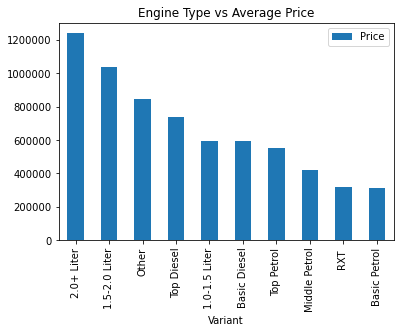

In [50]:
df_vrnt = pd.DataFrame(df.groupby(['Variant'])['Price'].mean().sort_values(ascending = False))
df_vrnt.plot.bar()

plt.title('Engine Type vs Average Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

We can see that 2 liter engine is the most common engine size.

#### Multi variate analysis

<Figure size 1080x1080 with 0 Axes>

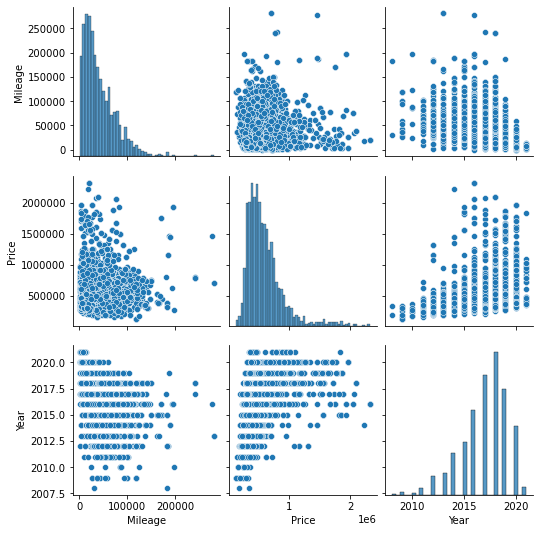

In [51]:
plt.figure(figsize=(15,15))
sns.pairplot(df)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

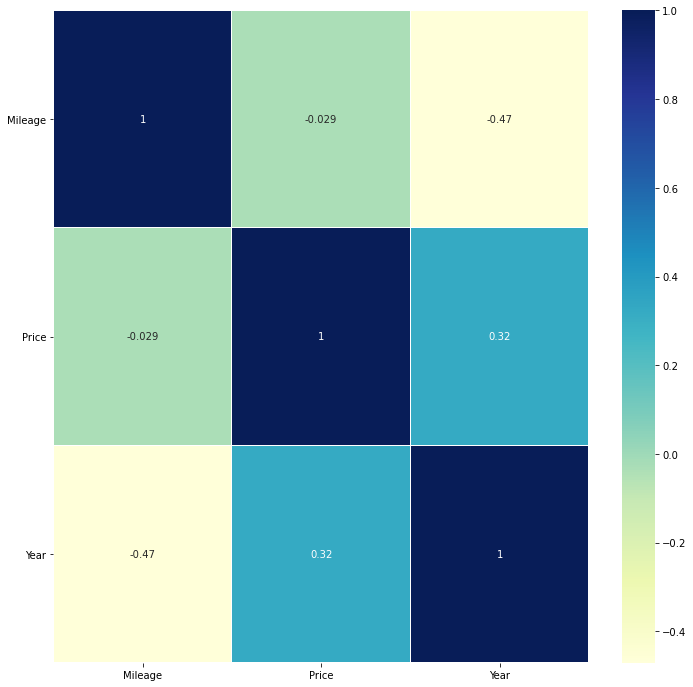

In [52]:
plt.figure(figsize=(12,12)) # Co-relation heat map
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0); # Checkign co-relation

In [53]:
df.loc[df.groupby('Model').Variant.transform('count').lt(20), 'Variant'] = 'Other'  
# If less that 20 count, Model is renamed to 'Other'

In [54]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the df

df = dummies('Transmission type',df)
df = dummies('Variant',df)
df = dummies('Owned',df)
df = dummies('Fuel type',df)
df = dummies('City',df)
df = dummies('Manufacturer',df)
df = dummies('Model',df)

In [55]:
df.head() # Dummy variables have been created

,Mileage,Price,Year,Manual,1.5-2.0 Liter,2.0+ Liter,Basic Diesel,Basic Petrol,Middle Petrol,Other,RXT,Top Diesel,Top Petrol,2nd Owner,3rd Owner,4th Owner,Petrol,Petrol + CNG,Petrol + LPG,Bengaluru,Bhopal,Chandigarh,Chennai,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Lucknow,Ludhiana,Meerut,Mumbai,Mysore,Nasik,Panipat,Pune,Rajkot,Rohtak,Surat,Vadodara,BMW,Chevrolet,Datsun,Ford,HYUNDAI,Honda,Hyundai,Jeep,KIA,MG,Mahindra,Maruti,Mercedes,Nissan,RENAULT,Renault,Skoda,Ssangyong,Tata,Toyota,Volkswagen,A,A3,A4,ALTROZ,AURA,Alto,Amaze,Ameo,BR-V,Baleno,Benz,Bolero,Brio,CRV,Camry,Captur,Celerio,Ciaz,City,Civic,Compass,Corolla,Creta,Cruze,Duster,Dzire,Ecosport,Eeco,Elite,Endeavour,Eon,Ertiga,Etios,FREESTYLE,Figo,Fortuner,GRAND,Glanza,Go,Grand,HECTOR,Harrier,Hexa,IGNIS,Innova,Jazz,Jetta,KAROQ,Kiger,Kuv100,Kwid,Lodgy,MARAZZO,Micra,Mobilio,NEW,NEXON,Nano,New,OMNI,Octavia,Polo,Q3,Rapid,Redi,Rexton,Ritz,S,SELTOS,Santro,Scorpio,Swift,TRIBER,TUV300,Terrano,Tiago,Tucson,VENUE,Vento,Verna,Vitara,WR-V,Wagon,X1,XL6,XUV,XUV500,Xcent,YARIS,Zen,i10,i20
0,53517,482299,2013,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,39294,898999,2018,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,69894,474699,2017,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,48582,590199,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3094,1704999,2020,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
df.shape # We have 5339 rows, and 157 coulmns after creating dummy variables

(3545, 153)

Skew of Pirce: 2.027153091935312


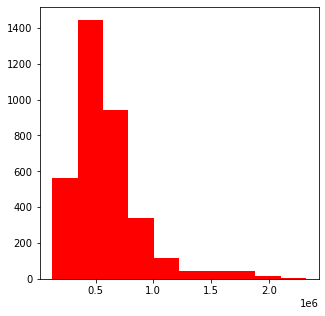

In [57]:
fig = plt.figure(figsize=(5,5))

print ("Skew of Price:", df.Price.skew())
plt.hist(df.Price,  color='red')
plt.show() # Checking skew of target variable

Skew of Log-Transformed Price: 0.36173692988097933


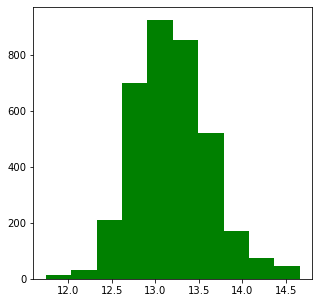

In [58]:
fig = plt.figure(figsize=(5,5))

print ("Skew of Log-Transformed Price:", np.log1p(df.Price).skew())
plt.hist(np.log1p(df.Price), color='green')
plt.show() # Fixing the skew by taking log

Skew of Mileage 1.6141683221881855


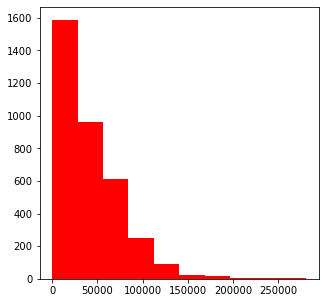

In [59]:
fig = plt.figure(figsize=(5,5))

print ("Skew of Mileage", df.Mileage.skew())
plt.hist(df.Mileage,  color='red')
plt.show() # Checking skew of variable

Skew of Log-Transformed Mileage -1.476125625236642


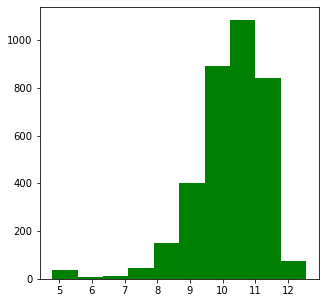

In [60]:
fig = plt.figure(figsize=(5,5))

print ("Skew of Log-Transformed Mileage", np.log1p(df.Mileage).skew())
plt.hist(np.log1p(df.Mileage), color='green')
plt.show() # Reducting the skew by taking log

### Model building phase

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, cross_val_predict
import sklearn.metrics as sm
from math import e
# Importing useful libraries

In [62]:
df.head()

,Mileage,Price,Year,Manual,1.5-2.0 Liter,2.0+ Liter,Basic Diesel,Basic Petrol,Middle Petrol,Other,RXT,Top Diesel,Top Petrol,2nd Owner,3rd Owner,4th Owner,Petrol,Petrol + CNG,Petrol + LPG,Bengaluru,Bhopal,Chandigarh,Chennai,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Lucknow,Ludhiana,Meerut,Mumbai,Mysore,Nasik,Panipat,Pune,Rajkot,Rohtak,Surat,Vadodara,BMW,Chevrolet,Datsun,Ford,HYUNDAI,Honda,Hyundai,Jeep,KIA,MG,Mahindra,Maruti,Mercedes,Nissan,RENAULT,Renault,Skoda,Ssangyong,Tata,Toyota,Volkswagen,A,A3,A4,ALTROZ,AURA,Alto,Amaze,Ameo,BR-V,Baleno,Benz,Bolero,Brio,CRV,Camry,Captur,Celerio,Ciaz,City,Civic,Compass,Corolla,Creta,Cruze,Duster,Dzire,Ecosport,Eeco,Elite,Endeavour,Eon,Ertiga,Etios,FREESTYLE,Figo,Fortuner,GRAND,Glanza,Go,Grand,HECTOR,Harrier,Hexa,IGNIS,Innova,Jazz,Jetta,KAROQ,Kiger,Kuv100,Kwid,Lodgy,MARAZZO,Micra,Mobilio,NEW,NEXON,Nano,New,OMNI,Octavia,Polo,Q3,Rapid,Redi,Rexton,Ritz,S,SELTOS,Santro,Scorpio,Swift,TRIBER,TUV300,Terrano,Tiago,Tucson,VENUE,Vento,Verna,Vitara,WR-V,Wagon,X1,XL6,XUV,XUV500,Xcent,YARIS,Zen,i10,i20
0,53517,482299,2013,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,39294,898999,2018,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,69894,474699,2017,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,48582,590199,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3094,1704999,2020,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
X=df.drop(['Price'], axis = 1, inplace = False) # Training variables
y=df['Price'] # Testing variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (2836, 152)
Y Train Shape  (2836,)
X Test Shape  (709, 152)
Y Test Shape  (709,)


### Decision tree regressor

In [64]:
dtr = DecisionTreeRegressor(random_state=5)
dtr.fit(X_train, y_train)
y_pred_dt = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.7835208534441132

In [65]:
scr = cross_val_score(dtr, X,y, cv=4)
print(scr.mean())

0.8424231858319405


In [66]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_dt), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_dt), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_dt), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_dt), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_dt), 2))

Mean absolute error = 46876.73
Mean squared error = 17450148575.46
Median absolute error = 9800.0
Explain variance score = 0.78
R2 score = 0.78


### Random forest regression

In [67]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.9145346168249961

In [68]:
scr = cross_val_score(rfr, X,y, cv=4)
print(scr.mean())

0.8835488333313919


In [69]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred_rfr), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred_rfr), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred_rfr), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred_rfr), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred_rfr), 2))

Mean absolute error = 41269.75
Mean squared error = 6889271591.24
Median absolute error = 21212.0
Explain variance score = 0.91
R2 score = 0.91


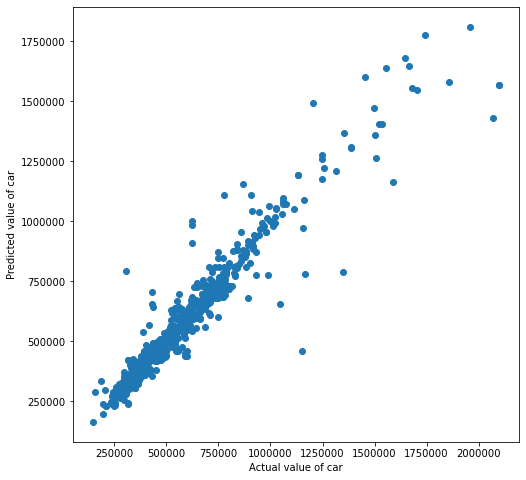

In [70]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred_rfr)
plt.xlabel("Actual value of car")
plt.ylabel("Predicted value of car")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

<AxesSubplot:xlabel='Price', ylabel='Density'>

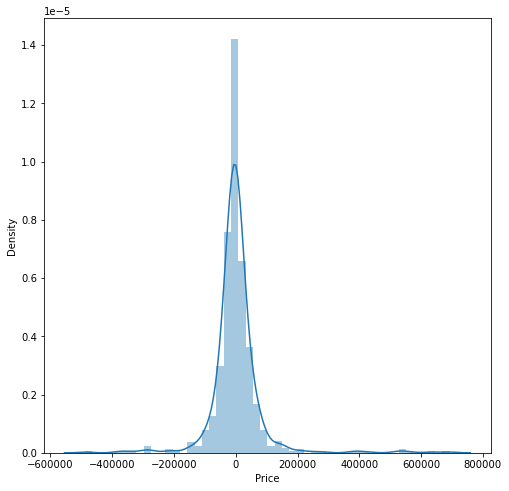

In [71]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-y_pred_rfr)

## Taking log of Price, Mileage and min-max of year data 

In [72]:
df['Price'] = np.log(df['Price'])
df['Mileage'] = np.log(df['Mileage'])
df['Year']=(df['Year']-df['Year'].min())/(df['Year'].max()-df['Year'].min())

In [73]:
X=df.drop(['Price'], axis = 1, inplace = False)
y=df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (2836, 152)
Y Train Shape  (2836,)
X Test Shape  (709, 152)
Y Test Shape  (709,)


### Random forest regression 

In [74]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.9306448307001101

In [75]:
scr = cross_val_score(rfr, X,y, cv=4)
print(scr.mean())

0.8985542819131052


### Decision tree regressor 

In [76]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=5)
dtr.fit(X_train, y_train)
y_pred_dt = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.9036113548355402

In [77]:
scr = cross_val_score(dtr, X,y, cv=4)
print(scr.mean())

0.8514668386214974


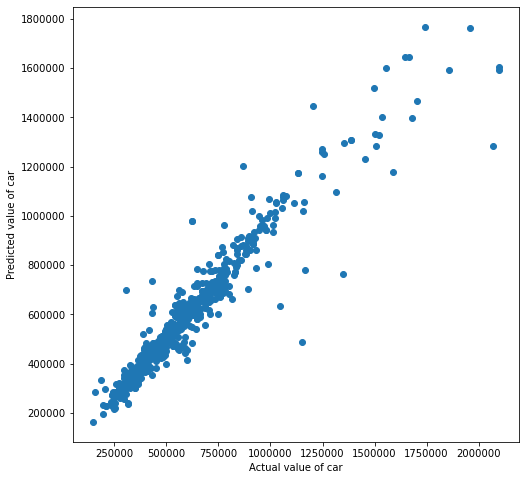

In [78]:
plt.figure(figsize=(8,8)) # Scatter plot of predicted vs actual values
plt.scatter(e**(y_test),e**(y_pred_rfr))
plt.xlabel("Actual value of car")
plt.ylabel("Predicted value of car")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

<AxesSubplot:xlabel='Price', ylabel='Density'>

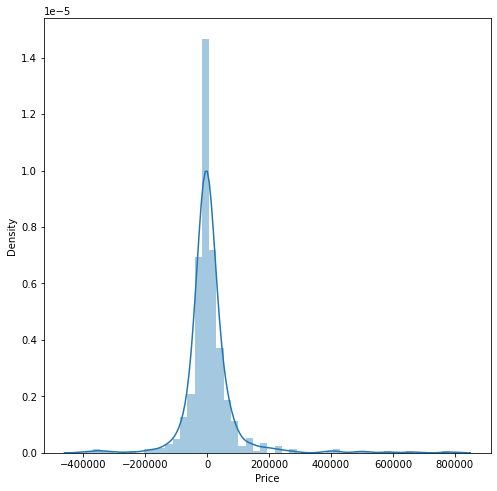

In [79]:
plt.figure(figsize=(8,8))
sns.distplot(e**y_test-e**y_pred_rfr) # As I took log before, re-converting the values to real prices

### Support vector regression

In [80]:
svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
svr.score(X_test, y_test)

0.8506008641068246

In [81]:
scr = cross_val_score(svr, X,y, cv=5)
print(scr.mean())

0.8289945652217025


### Hyper paramter tuning

I will be performing hyper parameter tuning on the random forest regressor model, as it gave the best performance.

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
parameters = { 'n_estimators' : [100,150],
               'min_samples_leaf' : [1,2], 
              'min_samples_split': [2,3],
              'criterion': ['mse','mae']
}

In [84]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [85]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 150]})

In [86]:
GCV.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 150}

Training model according to the best parameters

In [87]:
mod = RandomForestRegressor(min_samples_leaf= 1, min_samples_split =3, n_estimators = 150, criterion='mse')
mod.fit(X_train,y_train)
pred = mod.predict(X_test)
mod.score(X_test,y_test)

0.9302295256916011

In [88]:
scr = cross_val_score(mod, X,y, cv=4)
print(scr.mean())

0.8988360574114244


As we can observe hyper parameter tuning improved the r^2 score to 0.93 which is good.

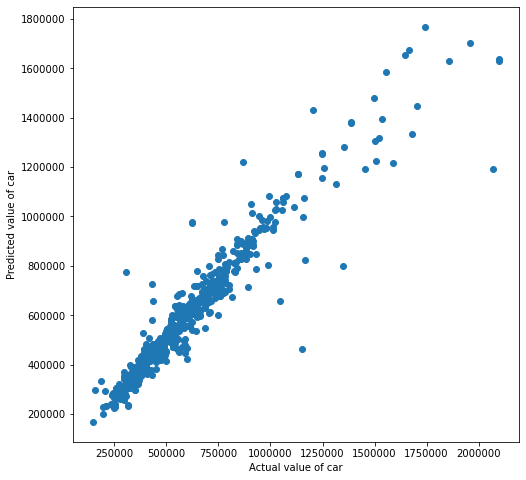

In [89]:
plt.figure(figsize=(8,8))
plt.scatter(e**y_test,e**pred)
plt.xlabel("Actual value of car")
plt.ylabel("Predicted value of car")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

Scatter plot of predicted vs actual values, we can se ethat there are some outliers, but most of the values lie in a stright line at 45deg which is optimal. 

We also got a much tighter fir near 0 deviation which means our model is performing well.

<AxesSubplot:xlabel='Price', ylabel='Density'>

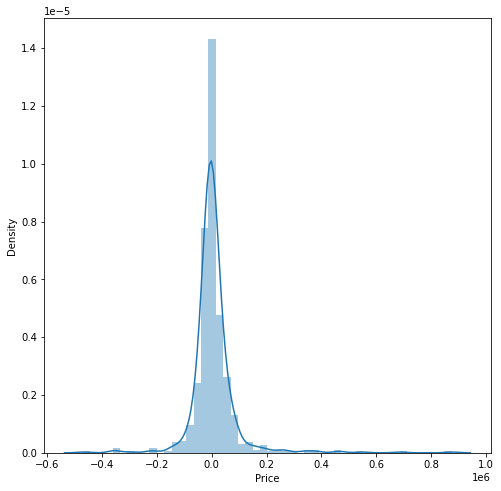

In [90]:
plt.figure(figsize=(8,8))
sns.distplot(e**y_test-e**pred) # As I took log before, re-converting the values to real prices

### Saving the model

In [92]:
import joblib
joblib.dump(mod,"CarPricePred.pkl")

['CarPricePred.pkl']

Thank you 